# Report

## LoRa
Кажется, что уже на всех курсах мы делали LoRa. Не особо понял смысл задания,
при том, что оно является сабсетом следующено. Просто запустил на сырых даннх без
выделения промпта в отдельную сущность через лейблы, чтобы на него не училась модель.

## SFT
- Во время обучения понял, что надо было просто выкинуть длинные примеры, а не обрезать их, так как все равно обрезаю до 100к выборку, чтобы полную эпоху проучить.
- Валидацию надо было вообще не резать по длине, лучше примеров меньше взять, чтобы не было байеса в сторону маленьких длин. Если останется время, перезапущу эксп, сравнить валидацию во время обучения не получится, но после обучения сравню на не порезанной валидации.
- Чувствительность шедулера тоже надо понизить, так как он не успел шагнуть достаточное количество шагов для снижения lr, возможно стоит взять вместо ReduceOnPlateu CosineAnealing. Я выбрал текущий шедулер, потому, что думал, что есть вероятность остановить досрочно обучение, если обучение сойдется раньше, но этого не произошло.
- LR вроде выбран нормально. Я рассматривал только взять его больше до начала обучения, но в этом случае стоило бы увеличить вармап, так как даже после вармапа градиенты по виду довольно сильно шумели. Не знаю, насколько норм, что у меня так шумят градиенты, возможно стоило поставить больше Gradient Accumulation Step.
- Еще прикольно было бы включить другие штуки в логгинг типа примеров на которых модель ошибается и утилизации GPU и кол-во памяти GPU.
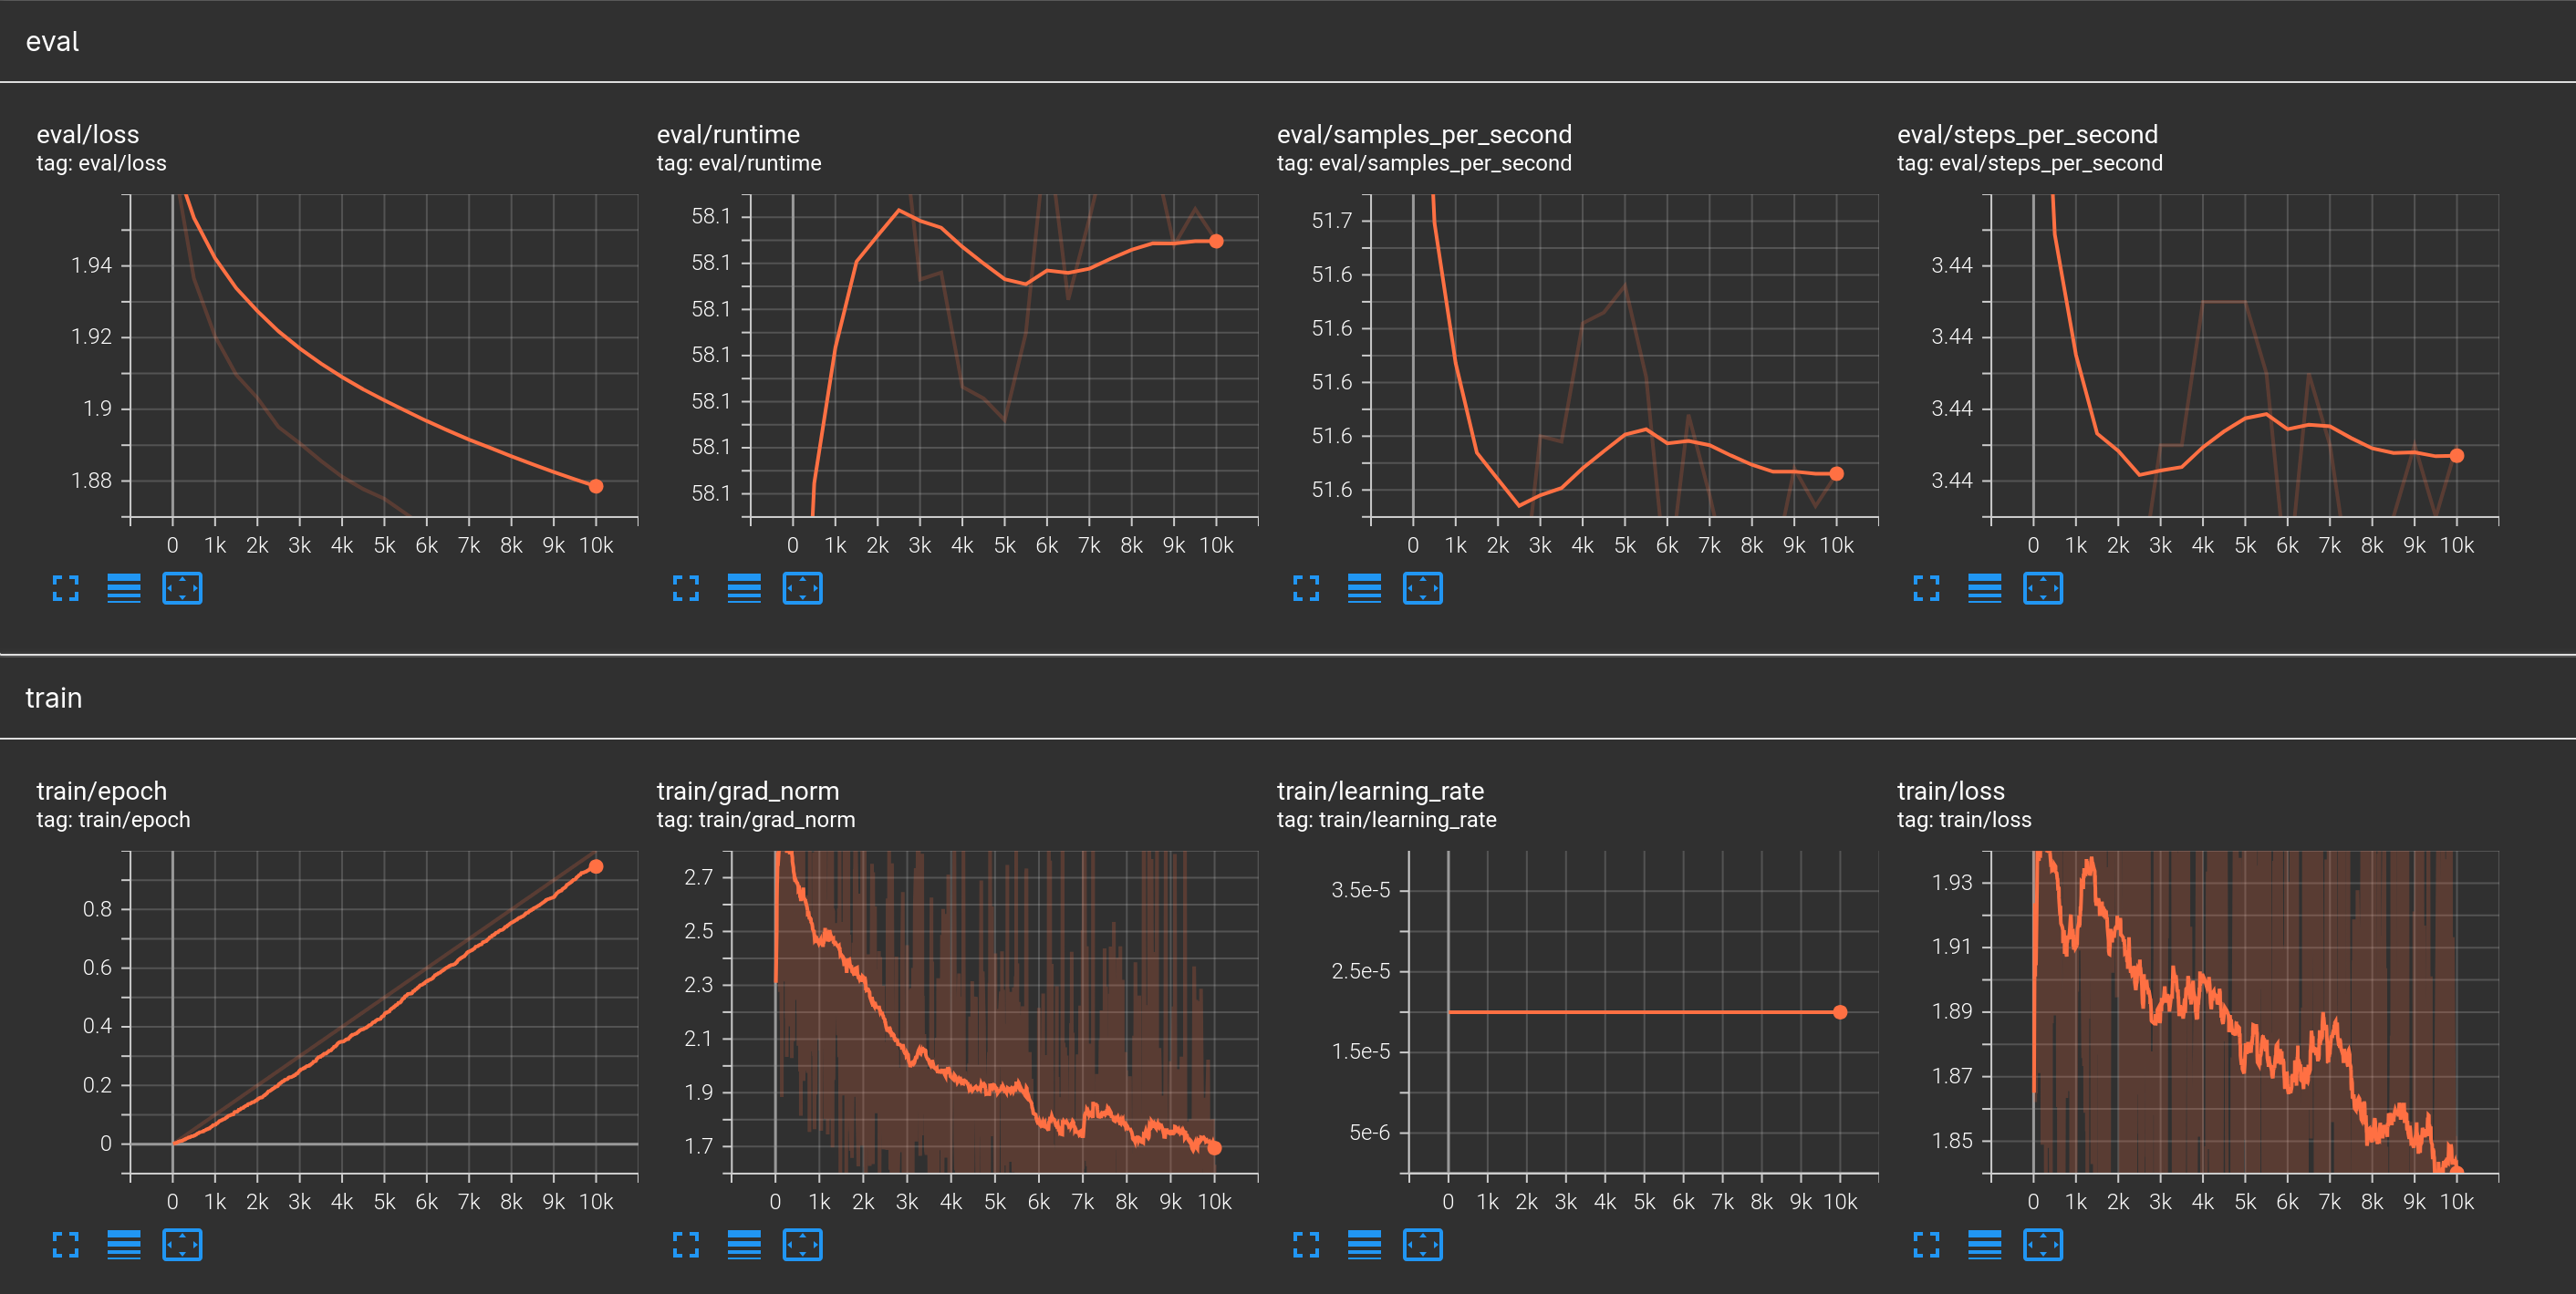

## DPO
Я попытался выкинуть длинные примеры, как хотел в прошлом задании, но паралельно решил установить Flash Attention на сервер, он завис, и я чуть не лишился всего проекта. Вместе с этим у меня перестала работать фильтрация датасета внутри ноутбука, а время уже пожимало, поэтому все эксперименты я решил не делать, чтобы хоть как-то обучилась модель.

### Что хотелось впоследствии попробовать/поменять:
- поставить реже валидацию и реже логирование, чтобы валидация не занимала половину обучения
- проверить, насколько FlashAttention2 ускоряет обучение
- взять больше выборки и дообучться дольше, интересно, какой предел у DPO и когда модель начнет переобучаться
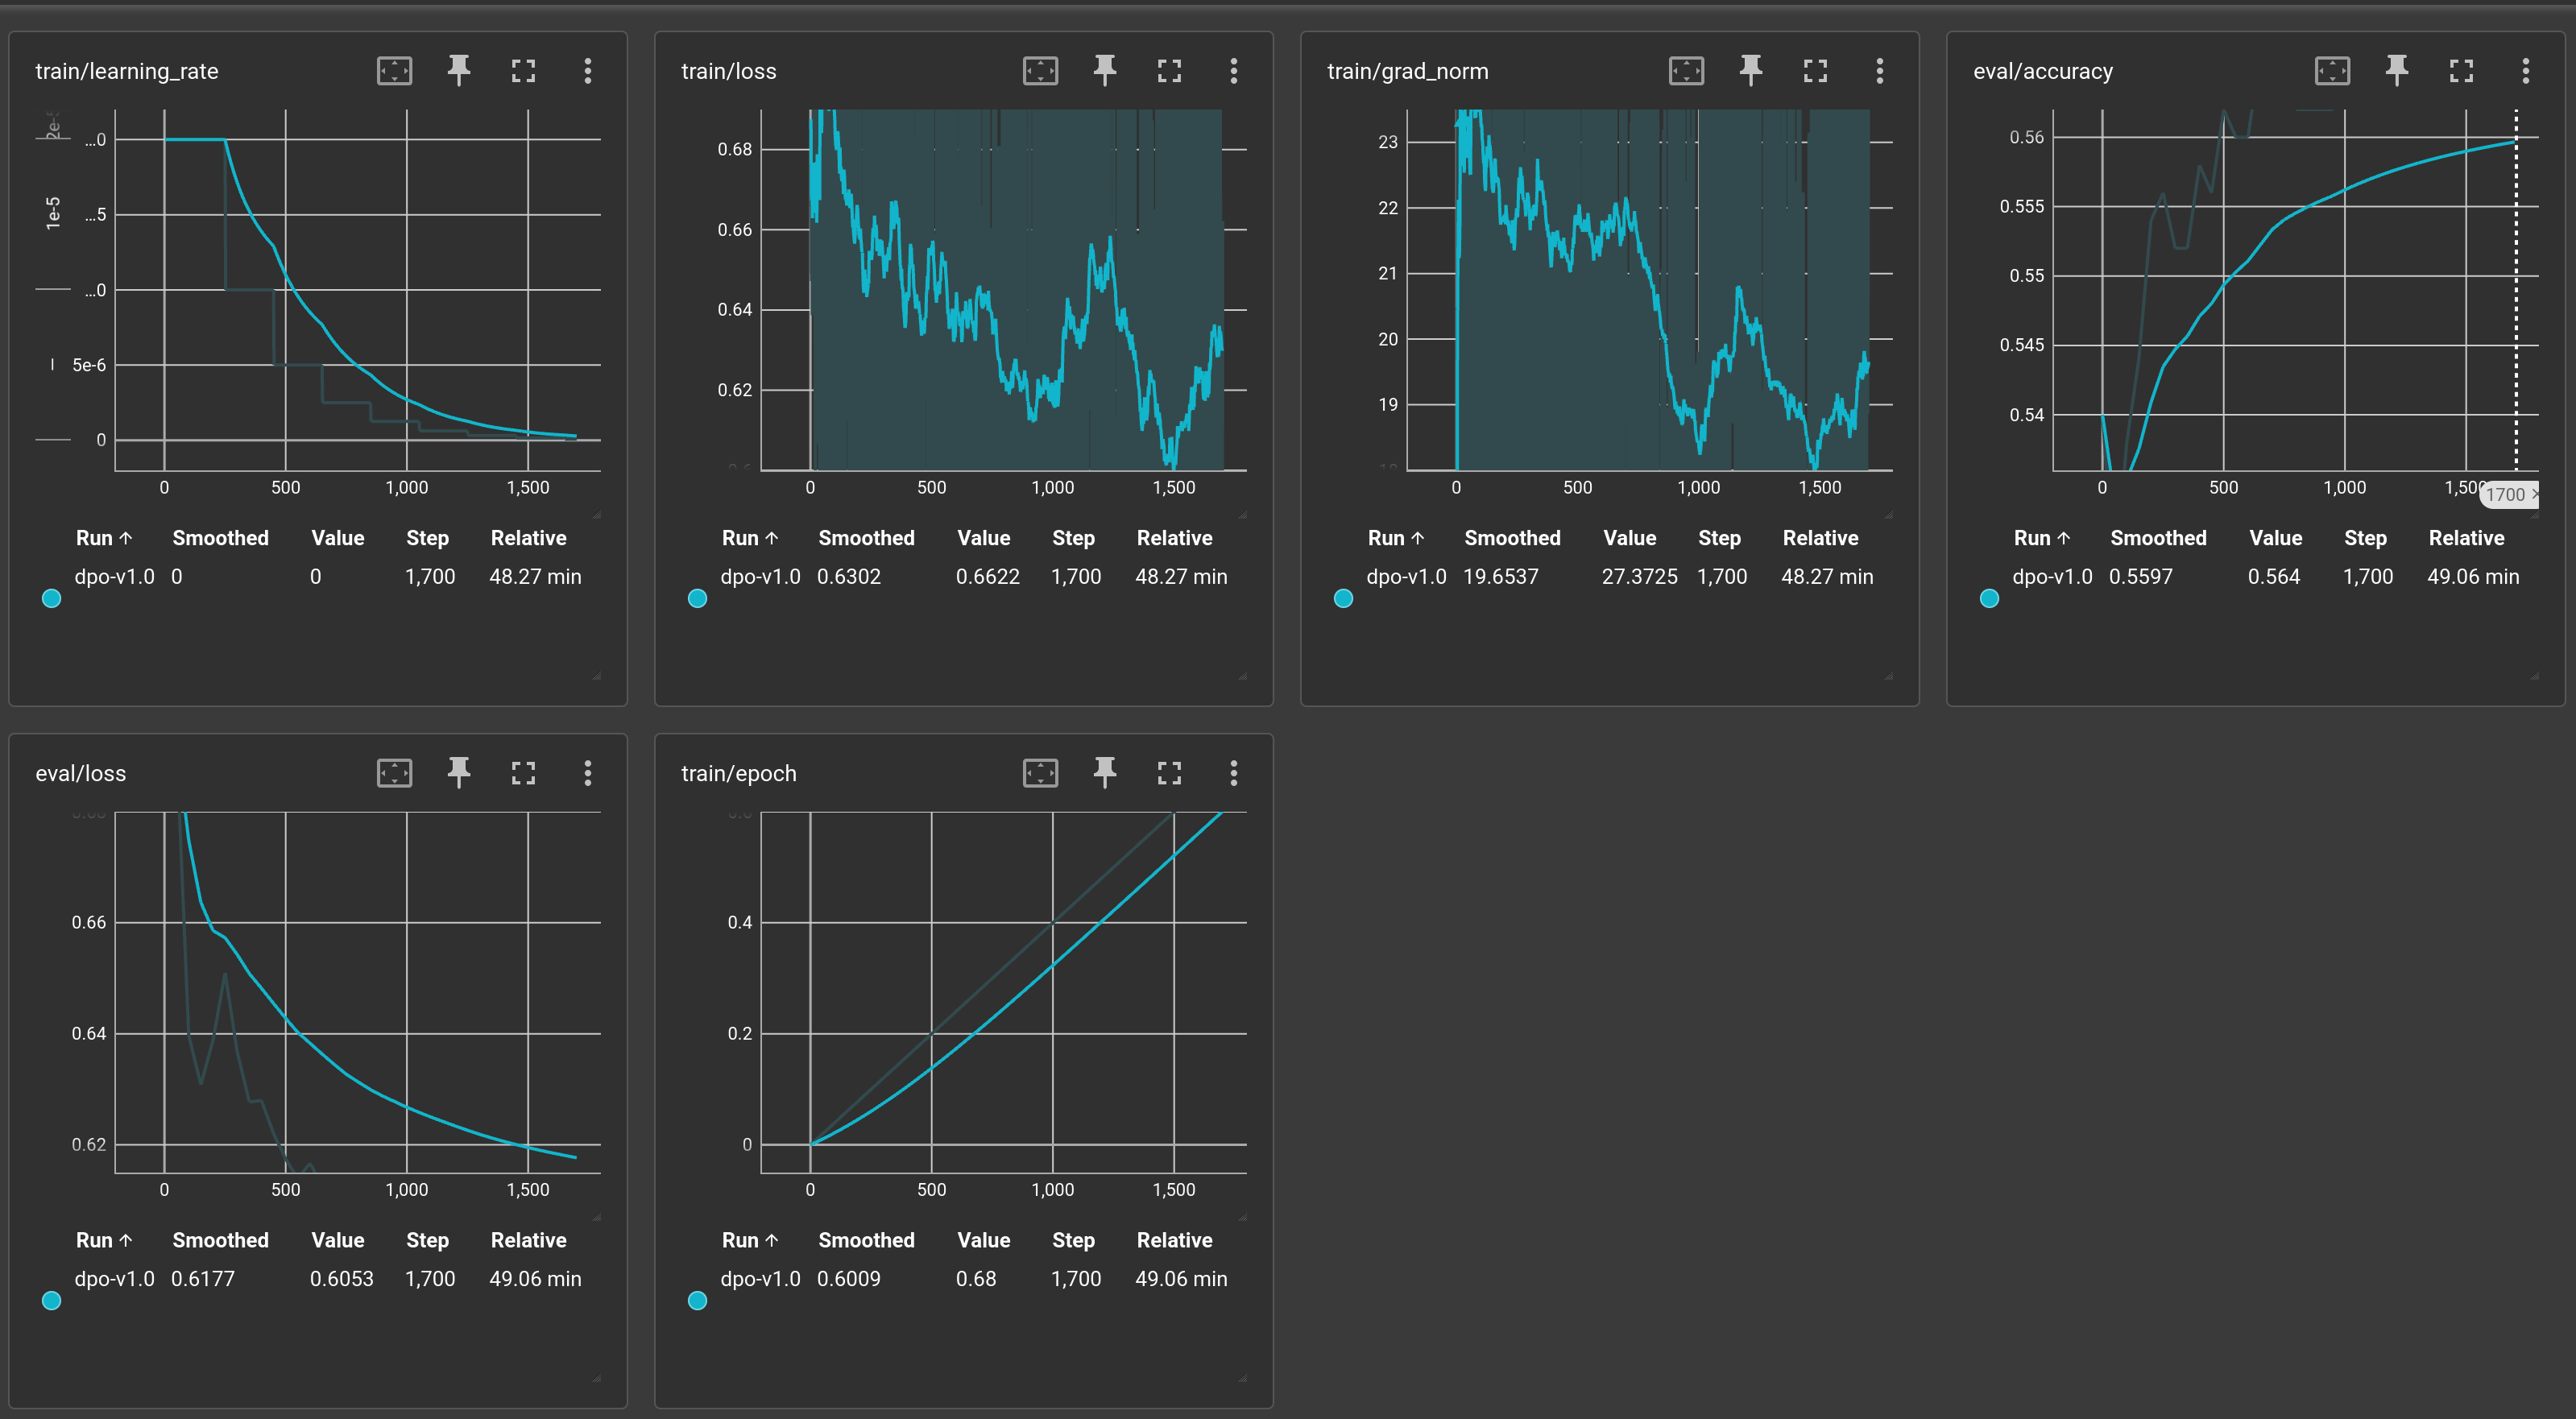

### Разница с SFT версией
сравнить модели не получилось, так как чекпоинт не сохранился(
но 10 пунктов на eval loss speak for it self.